# **Logistic Regression - Initial Model Building, Model Interpretation & Significance Test**

---
**Outline**

1. Introduction to Logistic Regression
2. Model Building
3. Model Interpretation
 - Linear Approximation Interpretation
 - Odds Ratio Interpretation
 - Standardized Parameter Interpretation
 - Predicted Probabilities
4. Significance Testing

In [3]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# <font color='white'>Review - Introduction to Logistic Regression

# **Initial Model Building**

## **Likelihood Function**

The probability of the observed data that expressed as a function
of the parameter $\pi$ (success probability).

In general, **likelihood function** for the identical and independent observations with binary response:

$$
\mathcal{L} = \prod_{i=1}^{n}\pi(x_{i})^{y_{i}}[1-\pi(x_{i})]^{(1-y_{i})}
$$
- If $y_i=1$, the likelihood value for the observation is the success probability itself:
$$
\ell = \pi(x_{i})^{1}[1-\pi(x_{i})]^{0} = \pi(x_{i})
$$
<br>
- Otherwise, $y_i=0$, the likelihood value for the observation is the failure probability:
$$
\ell = \pi(x_{i})^{0}[1-\pi(x_{i})]^{1} = 1-\pi(x_{i})
$$

## **Maximum Likelihood Estimation (MLE)**
The maximum likelihood estimate is the parameter value at which the likelihood function takes its maximum value.

- We want the maximum likelihood estimate $\pi(x)$ from the n observations, where:
$$
\pi(x) = \frac{e^{(\beta_{0}+\beta_{1}x)}}{1+e^{(\beta_{0}+\beta_{1}x)}}
$$
- To maximize the likelihood function $\mathcal{L}$, we need to find the optimum parameter $\beta_{0}$ and $\beta_{1}$.

## **Negative Log Likelihood (Log Loss)**

In [1]:
# **Initial Model Building**

- It is easier mathematically to work with the (natural) log of equation.
- So, we transform the likelihood function into **log likelihood function**:
$$
\log(\mathcal{L}(\beta)) = \sum_{i=1}^{n}(y_{i}\log[\pi (x_{i})]+(1-y_{i})\log[1-\pi(x_{i})])
$$
- We want to maximize the log likelihood, but gradient descent optimization works to minimize the cost function.
- Thus, we take the negative value of log likelihood as the cost function.
- The **negative log likelihood (NLL)** or **log loss** is defined as:
$$
\text{NLL}=-\log(\mathcal{L}(\beta)) = -\sum_{i=1}^{n}(y_{i}\log[\pi (x_{i})]+(1-y_{i})\log[1-\pi(x_{i})])
$$

## **Optimization with Gradient Descent**

**Our Objective**
- **Minimize** the cost function log loss.

$$
\underset{\beta}{\arg \min} \ \text{NLL}(\beta)
$$

- We find the optimum parameter $\beta_{j}$ where:
$$
\frac{\partial \text N \text L \text L}{\partial \beta_{j}}=0
$$
<br>
- The derivative of log loss or negative log-likelihood (NLL) w.r.t. $\beta_{j}$ is called the gradient of $\beta_{j}$.

$$
\frac{\partial \text N \text L \text L}{\partial \beta_{j}}=-\sum_{i=1}^{n}\left [ y_{i}-\pi(x_{i}) \right ]x_{j},$$ 
<center> or </center>

$$ \frac{\partial \text N \text L \text L}{\partial \beta_{j}}=\sum_{i=1}^{n}\left[ \pi(x_{i}) - y_{i} \right ]x_{j},$$ 

<center> with  </center> 

$$ j=1,2,\dots,p$$

# **Model Interpretation**

## **1. Linear Approximation Interpretation**
- Logistic/sigmoid model is curved rather than a straight line.

<center> <img src="https://drive.google.com/uc?id=1PLmvTPnf5DDYEfbmMmshz78yhr0tRxdR" width=500> </center>

1. Logistic/sigmoid model is curved rather than a straight line.
  - That line has slope equal to $\beta \pi(x)[1-\pi(x)]$ for parameter $\beta$.
  - When $\pi(x)$=0 or $\pi(x)$=0, the slope approaches 0.
  - At which level the steepest slope occurs?
    - Answer: at median effective level, when $\pi(x)$=0.5.
    - At median effective level, $\pi(x)$=0.5 has slope $\beta (0.5)[1-(0.5)] = 0.25 \beta$
2. Median effective level is the level at which each
outcome has a 50% chance, or a success is as likely as a failure.
  - Mathematically, median effective level is the $x$ value at which the odds($\pi(x)$)=1 or $\pi(x)$=0.5
  - Median effective level is denoted $EL_{50}$
$$
EL_{50} = -\beta_{0}/\beta_{1}
$$
3. $EL_{50}$ represents the estimated rate of probability change is greatest at the $EL_{50}$ value at which  $\pi(x)$=0.5.
4. In conclusion, **at $EL_{50}$ value, the estimated probability increases at the rate of $0.25 \beta$ per one unit increase in $x$**.

## **2. Odds Ratio Interpretation**

- Remember the logit or log(odds) function:
$$
\text{log(odds)} = \beta_{0}+\beta_{1}x
$$
  - Interpretation: every one unit increase in $x$ implies the increase in $\beta_{1}$ unit in log odds.

- To interpret in terms of odds, we transform the log(odds) into odds.
$$
\text {log(odds)} = \beta_{0}+\beta_{1}x
$$
  - Thus,
$$
\begin{align*}
\text {odds} &= e^{(\beta_{0}+\beta_{1}x)} \\
&= e^{\beta_{0}} \left (e^{\beta_{1}} \right )^{x} \\
\end{align*}
$$
  - Interpretation: **the estimated odds of success multiply by $\text{exp}(\beta_{1})$ for one unit increase in $x$.**

## **3. Predicted Probabilities**

- Remember odds interpretation:
$$
\text{odds} = \frac{\pi(x)}{1-\pi(x)}
$$
- With success probability $\pi(x)$:
$$
\begin{align*}
\pi(x) &= \frac{e^{(\beta_{0}+\beta_{1}x)}}{1+e^{(\beta_{0} +\beta_{1}x)}} \\
&= \frac{e^{\text{log(odds)}}}{1+e^{\text{log(odds)}}} \\
\pi(x) &= \frac{\text{odds}}{\text{1+odds}}
\end{align*}
$$
- $\text{odds}=1$ means
$$
\begin{align*}
\pi(x) &= \frac{\text{odds}}{\text{1+odds}} \\
\pi(x) &= \frac{1}{1+1} \\
\pi(x) &= 0.5 \\
\end{align*}
$$
- Thus,
  - $\text{odds}>1$ implies $\pi(x)>0.5$, and
  - $\text{odds}<1$ implies $\pi(x)<0.5$
- Now we can interpret the decision boundary for logistic model.
  - If $\pi(x)>0.5$, the observation is classified in the success category ($Y=1$),
  - Otherwise $\pi(x) \leq 0.5$, the observation is classified in $Y=0$.

# **Significance Testing**

- The hypotheses:
  - Null Hypothesis: the probability of success $\pi(x)$ is **independent** of $x$.
  - Alternative Hypothesis: the probability of success $\pi(x)$ is **not independent** of $x$.
    - $\text H_{0} : \beta = 0$
    - $\text H_{1} : \beta \neq 0$

- Test statistic:
  - Wald statistic:
  $$
  z = \beta/ \text{SE}$$ or
  - Wald Chi-squared statistic:
  $$
  z^{2}=(\beta/ \text{SE})^{2}$$
  with degree of freedom = 1

- Rejection region:
  - Reject null hypothesis ($\text H_{0}$) if $z>z_{\alpha}$ or $z^{2}>\chi^{2}_\alpha, _{\; \text{df}=1}$, or
  - Reject null hypothesis ($\text H_{0}$) if $\text{P-value}<\alpha$.


# <font color='white'>Model Building</font>

In [9]:
# Import dataset from csv file
data = pd.read_csv('horse_crab.csv')

# Table check
data.head()

,Unnamed: 0,Color,Spine,Width,Weight,Satellite
0,0,2,3,28.3,3.05,1
1,1,3,3,26.0,2.60,1
2,2,3,3,25.6,2.15,0
3,3,4,2,21.0,1.85,0
4,4,2,3,29.0,3.00,1


In [10]:
# Information check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  173 non-null    int64  
 1   Color       173 non-null    int64  
 2   Spine       173 non-null    int64  
 3   Width       173 non-null    float64
 4   Weight      173 non-null    float64
 5   Satellite   173 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 8.2 KB


The dataset has **173 observations** from **5 variables**, but we will use only response variable (Satellite) and one explanatory variable (Width).

In [12]:
# Code the response variable Satellite
# Satellite=0 --> Satellite=0, otherwise Satellite=1
data['Satellite'] = data['Satellite'].apply(lambda x: 0 if x==0 else 1)

# Use only 2 variables of interest
data = data[['Satellite', 'Width']]

# Data check
data.head()

,Satellite,Width
0,1,28.3
1,1,26.0
2,0,25.6
3,0,21.0
4,1,29.0


 ---
## **1. Likelihood Function**
In general, **likelihood function** for the identical and independent observations with binary response:

$$
\mathcal{L} = \prod_{i=1}^{n}\pi(x_{i})^{y_{i}}[1-\pi(x_{i})]^{(1-y_{i})}
$$

In [13]:
# Describe the counts of each response category
count_data = data['Satellite'].value_counts()
count_data

1    111
0     62
Name: Satellite, dtype: int64

- Assume $\pi(x_{i}) = 0.5$, $\forall i$.
- Can you calculate the likelihood value from the horseshoe crab observations?

In [14]:
p_success = 0.5
n_success = count_data.loc[1]
n_failed = count_data.loc[0]

likelihood = (p_success**n_success) * ((1-p_success)**n_failed)

<details>
    <summary><b>Click to see answer</b></summary>

```python
p_success = 0.5
n_success = count_data.loc[1]
n_failed = count_data.loc[0]

likelihood = (p_success**n_success) * ((1-p_success)**n_failed)
```

Or in numbers:
```python
likelihood = (0.5**111)*((1-0.5)**62)
```


In [15]:
# Transform likelihood into log-likelihood
log_likelihood = np.log(likelihood)

log_likelihood

-119.91446223687053

---
## **2. Maximum Likelihood Estimation**
The maximum likelihood estimate is the parameter value at which the likelihood function takes its maximum value.

1. Calculate the likelihood and log-likelihood value when **$\pi(x_{i})$ = 0.4** for $i$=1,2,...173.

2. Calculate the likelihood and log-likelihood value when **$\pi(x_{i})$ = 0.6** for $i$=1,2,...173.


- The estimate of $\pi(x_{i})$=0.6 yields the largest likelihood/log-likelihood value.
- $\pi(x_{i})$ is the estimate of success probability.
- From 173 observations, 111 are success observations (y=1, the crab having any satellite).
- Thus p(success) = 111/173 = 0.64 --> estimate of success probability falls between [0.6,0.7].

**Summary:**
- Make a plot of likelihood/log-likelihood value for each estimate of $\pi(x_{i})$.

In [17]:
# Assign the estimate value of pi in range [0.1,0.9]
pi = np.arange(0.1, 1, 0.1)

# Define the number of success and failed observations
n_success = count_data.loc[1]
n_failed = count_data.loc[0]

# Likelihood function for 173 crabs observations
likelihood = (pi**n_success)*((1-pi)**n_failed)


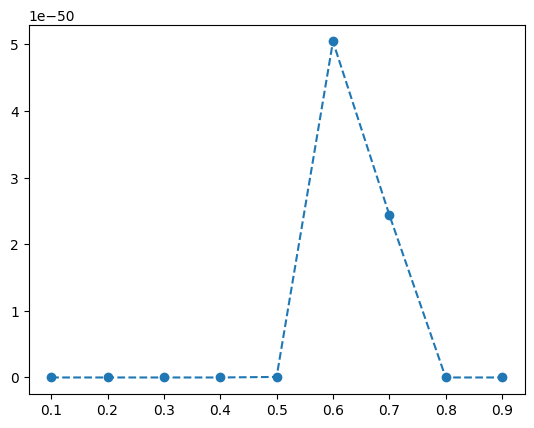

In [18]:
# Plot pi vs likelihood
plt.plot(pi, likelihood, '--o')

- Oops! The likelihood values are too small.
- It is easier mathematically to work with log transformation.
<br>
$$
\log(\mathcal{L}(\beta)) = \sum_{i=1}^{n}(y_{i}\log[\pi (x_{i})]+(1-y_{i})\log[1-\pi(x_{i})])
$$

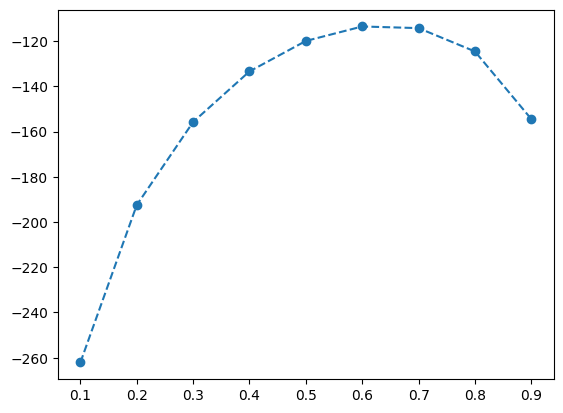

In [20]:
# Calculate log-likelihood
log_likelihood = n_success*np.log(pi) + n_failed*np.log(1-pi)

# Plot pi vs log-likelihood
plt.plot(pi, log_likelihood, '--o')

- The likelihood function for crabs data has its maximum at $\pi(x_{i})$ between 0.6 and 0.7, since the proportion of success is 0.64 of the total observations.

---
## **3. Optimization with Gradient Descent**

**Remember:**
- We want to maximize likelihood estimate $\pi(x)$ from the n observations, where:
$$
\pi(x) = \frac{e^{(\beta_{0}+\beta_{1}x)}}{1+e^{(\beta_{0}+\beta_{1}x)}}
$$
- Hence, we need to find $\beta_{0}$ and $\beta_{1}$ that maximize the likelihood.
- We call this the optimum $\beta_{0}$ and $\beta_{1}$.
- To find the optimum $\beta_{0}$ and $\beta_{1}$, we maximize the likelihood/log-likelihood function, or we minimize the **negative log-likelihood**:
$$
-\log(\mathcal{L}(\beta)) = -\sum_{i=1}^{n}(y_{i}\log[\pi (x_{i})]+(1-y_{i})\log[1-\pi(x_{i})])
$$
- We find the optimum parameter $\beta_{j}$ where:
$$
\frac{\partial \text{NLL}}{\partial \beta_{j}}=0 \;\;\;\;\;\text o \text r:
$$
$$
\sum_{i=1}^{n}\left [ \pi(x_{i})-y_{i} \right ]x_{j}=0, \;\;\;\;j=1,2,\dots,p
$$

---
**Optimization Algorithm:**
1. Define the response variable ($y$) and the explanatory variable ($X$).
2. Initialize parameter estimate $\beta_{0}=0.0$ and $\beta_{1}=0.0$.
3. Calculate the gradient $\frac{\partial \text {NLL}}{\partial \beta_{j}}$, thus we have the gradient of $\beta_{0}$ and $\beta_{1}$.
4. Update the new $\beta_{0}$ and $\beta_{1}$:
$$
\beta _{j}^{new} = \beta _{j}^{old} - \eta \; \frac{\partial \text{NLL}}{\partial \beta _{j}^{old}}
$$
7. Repeat step 2-4 until converge:
  - $\Delta \beta_{j} < \text{tolerance}$, or
  - $\nabla_{\beta_{j}} \text{NLL} < \text{tolerance}$
    - Note: $\nabla$ is the differential nabla operator or gradient, acting to a differentiable function.

In [22]:
# Define the input X and y
X = data[['Width']].to_numpy()
y = data['Satellite'].to_numpy()

In [23]:
# Function to initialize parameter estimate
def initialize_parameter(X):
    """
    Function to initialize the parameter estimate or coeficient.

    Parameters
    ----------
    X   : {array-like} of shape (n_sample, n_predictors)
        The independent variable or predictor

    Returns
    -------
    b_0 : float
        The intercept

    b_1 : {array-like} of shape (n_predictors, 1)
        The slope/weights
    """
    # Extract the number of predictors
    n_parameters = X.shape[1]

    # Initialize the parameter estimate
    b0_initial = 0.0
    b1_initial = np.zeros(n_parameters)

    return b0_initial, b1_initial

In [24]:
# Initialize b0 and b1
b0_initial, b1_initial = initialize_parameter(X)
b0_initial, b1_initial

(0.0, array([0.]))

**Calculate the success probability $\pi(x_{i})$ and cost function (log loss or negative log-likelihood).**
- Before calculate the gradient of $\beta_{0}$, $\beta_{1}$, and log loss, we need information about $y_{i}$ and $\pi(x_{i})$, where:
$$
\pi(x) = \frac{e^{(\beta_{0}+\beta_{1}x)}}{1+e^{(\beta_{0}+\beta_{1}x)}}
$$
- And we need additional information about log loss value of each iteration, thus we know the log loss value of the optimum $\beta_{0}$ and $\beta_{1}$ where:
$$
-\log(\mathcal{L}(\beta)) = -\sum_{i=1}^{n}(y_{i}\log[\pi (x_{i})]+(1-y_{i})\log[1-\pi(x_{i})])
$$

In [26]:
# Sigmoid function to calculate success probability (pi) of each observation
def sigmoid(X, b0, b1):
    """
    Function to calculate the success probability of X.

    Parameters
    ----------
    X   : {array-like} of shape (n_sample, n_predictors)
        The independent variable or predictor

    b_0 : float
        The intercept

    b_1 : {array-like} of shape (n_predictors, 1)
        The slope/weights

    Returns
    -------
    pi  : {array-like} of shape (n_sample, 1)
        The success probability of X
    """
    # Calculate the logit value
    logit = b0 + np.dot(X, b1)

    # Calculate the success probability
    pi = np.exp(logit) / (1+np.exp(logit))

    return pi

In [27]:
# Calculate pi from b0 and b1 initial for each observation
pi = sigmoid(X = X,
             b0 = b0_initial,
             b1 = b1_initial)
pi[0:3]

array([0.5, 0.5, 0.5])

- Then, we can calculate log loss or negative log-likelihood as cost function.
$$
-\log(\mathcal{L}(\beta)) = -\sum_{i=1}^{n}(y_{i}\log[\pi (x_{i})]+(1-y_{i})\log[1-\pi(x_{i})])
$$
- Break the function above into two parts:
  - `log_like_success =` $\sum_{i=1}^{n}(y_{i}\times \log[\pi (x_{i})])$ --> log loss value when $y_{i}=1$
  - `log_like_failure =` $\sum_{i=1}^{n}((1-y_{i})\times \log[1-\pi(x_{i})])$ --> log loss value when $y_{i}=0$
- Thus, the cost function log loss: `log_loss = -(log_like_success + log_like_failure)`

In [29]:
# Function to calculate the negative log likelihood (log loss) as cost function
def cost_function(y, pi, eps=1e-10):
    """
    Function to calculate the negative log-likelihood (log loss).

    Parameters
    ----------
    y   : {array-like} of shape (n_sample, )
        The dependent or response variable

    pi  : {array-like} of shape (n_sample, 1)
        The success probability of X

    eps : float
        The additional weight to avoid log of zero value

    Returns
    -------
    log_loss  : float
        The negative value of log-likelihood
    """
    # Calculate the log-likelihood value when y=1
    log_like_success = y * np.log(pi + eps)

    # Calculate the log-likelihood value when y=0
    log_like_failure = (1-y) * np.log(1-pi + eps)

    # Calculate the negative log-likelihood or log loss
    log_like_total = log_like_success + log_like_failure
    log_loss = -np.sum(log_like_total)

    return log_loss

In [30]:
# Calculate log loss
log_loss = cost_function(y = y,
                         pi = pi)
log_loss

119.91446220227053

**3. Calculate the gradient $\frac{\partial \text N \text L \text L}{\partial \beta}$.**
- Derivative of log loss or negative log-likelihood (NLL) w.r.t. $\beta_{j}$:
$$
\frac{\partial \text{NLL}}{\partial \beta_{j}}=\sum_{i=1}^{n}\left [ \pi(x_{i})-y_{i} \right ]x_{j}$$
with $j=1,2,\dots,p$ and $p$ is the number of parameter.
- Thus, derivative of log loss or negative log-likelihood (NLL) w.r.t. $\beta_{0}$:
$$
\frac{\partial \text N \text L \text L}{\partial \beta_{0}}=\sum_{i=1}^{n}\left [ \pi(x_{i})-y_{i} \right ]x_{0}
$$
  - We don't have $x_{0}$ in the data.
  - We can assume $x_{0}=1$ without changing the logit equation :
  $$
  \begin{align*}
  \text{logit}&=\beta_{0}(x_{0})+\beta_{1}(x_{1}) \\
  &=\beta_{0}(1)+\beta_{1}(x_{1}) \\
  \text{logit}&=\beta_{0}+\beta_{1}(x_{1}) \\
  \end{align*}
  $$
  - Thus, the gradient of $\beta_{0}$:
$$
\frac{\partial \text{NLL}}{\partial \beta_{0}}=\sum_{i=1}^{n}\left [ \pi(x_{i})-y_{i} \right ]
$$

In [32]:
# Calculate derivative of log loss w.r.t b0
def gradient_b0(pi, y):
    """
    Function to calculate the gradient of log loss w.r.t the intercept.

    Parameters
    ----------
    pi  : {array-like} of shape (n_sample, 1)
        The success probability of X

    y   : {array-like} of shape (n_sample, )
        The dependent or response variable

    Returns
    -------
    grad_b0  : float
        The gradient of log loss w.r.t the intercept
    """
    # Calculate the gradient of log loss w.r.t b0
    grad_b0 = np.sum(pi-y)

    return grad_b0

In [33]:
# Calculate the gradient of b0
grad_b0 = gradient_b0(pi = pi,
                      y = y)
grad_b0

-24.5

- Derivative of log loss or negative log-likelihood (NLL) w.r.t. $\beta_{1}$:
$$
\frac{\partial \text {NLL}}{\partial \beta_{1}}=\sum_{i=1}^{n}\left [ \pi(x_{i})-y_{i} \right ]x_{1}
$$
  - We only have one variable $x$, so $x_{1}=x$, which is:
  - `X = data[["Width"]].to_numpy()`


  - Thus, the gradient of $\beta_{1}$:
$$
\frac{\partial \text {NLL}}{\partial \beta_{1}}=\sum_{i=1}^{n}\left [ \pi(x_{i})-y_{i} \right ]x
$$

In [34]:
# Calculate derivative of log loss w.r.t b1
def gradient_b1(X, pi, y):
    """
    Function to calculate the gradient of log loss w.r.t the slope/weights.

    Parameters
    ----------
    X   : {array-like} of shape (n_sample, n_predictors)
        The independent variable or predictor

    pi  : {array-like} of shape (n_sample, 1)
        The success probability of X

    y   : {array-like} of shape (n_sample, )
        The dependent or response variable

    Returns
    -------
    grad_b1  : {array-like} of shape (n_predictors, 1)
        The gradient of log loss w.r.t the slope/weights
    """
    # Calculate the gradient of log loss w.r.t b0
    grad_b1 = np.dot((X.T),(pi-y))

    return grad_b1

In [35]:
# Calculate the gradient of b1
grad_b1 = gradient_b1(X = X,
                      pi = pi,
                      y = y)
grad_b1

array([-714.35])

**4. Optimization using Gradient Descent Algorithm.**

- Here we will update the new $\beta_{0}$, $\beta_{1}$, and its log loss value iteratively, where:
$$
\beta _{j}^{new} = \beta _{j}^{old} - \eta \; \frac{\partial \text{NLL}}{\partial \beta _{j}^{old}}
$$
  - $\eta$ = `eta` is the designated learning rate.
- Keep updating $\beta _{0}$ and $\beta _{1}$ until converge on the optimum value of $\beta _{0}$ and $\beta _{1}$, where $\nabla_{\beta_{j}} \text{NLL} < \text{tolerance}$, thus:
  - `if (abs(grad_b0) < tol and (abs(grad_b1) < tol`
  - `tol` is the designated tolerance value for stopping the iteration.


In [36]:
# Function to optimize b0 and b1 using gradient descent algorithm
def gradient_descent(X, y, eta=0.01, tol=1e-4):
    """
    Function to calculate the gradient of log loss w.r.t the slope/weights.

    Parameters
    ----------
    X   : {array-like} of shape (n_sample, n_predictors)
        The independent variable or predictor

    y   : {array-like} of shape (n_sample, )
        The dependent or response variable

    eta : float, default=0.01
        The designated learning rate

    tol : float, default=1e-4
        The tolerance of gradient to stop the iteration
        The iteration will stop if (the gradient of b0 and b1) < tol

    Returns
    -------
    b0  : float
        The optimum parameter estimate of intercept

    b1  : {array-like} of shape (n_predictors, 1)
        The optimum parameter estimate of slope/weights

    iterations  : {array-like} of shape (i, 1)
                The list of iterations to find the optimum estimate

    log_loss    : {array-like} of shape (i, 1)
                The list of log loss until the iteration stop
    """
    # Define initial b0 and b1
    b0_initial, b1_initial = initialize_parameter(X)

    # Make a list of iteration and log loss value for each iteration
    i = 0
    iterations = []
    log_loss_list = []

    # Make a criteria to run the iteration
    continue_iteration = True

    # Running the iteration
    while(continue_iteration):
        # Update i
        i += 1

        # Calculate success probability (pi) from the current b0 and b1
        pi = sigmoid(X,b0_initial,b1_initial)

        # Calculate log loss from the current b0 and b1
        log_loss = cost_function(y,pi)

        # Calculate gradient of b0 and b1
        grad_b0 = gradient_b0(pi,y)
        grad_b1 = gradient_b1(X,pi,y)

        # Updating the new b0 and b1 from the gradient of b0 and b1
        # Divide the gradient by n_sample to accelerate the optimum point
        b0 = b0_initial - eta*grad_b0/len(y)
        b1 = b1_initial - eta*grad_b1/len(y)

        # Stop when (the gradient of b0 and b1) < tolerance,
        if (abs(grad_b0) < tol) and (abs(grad_b1) < tol):
            return b0, b1, iterations, log_loss_list

        # Update b0 and b1 for the next iteration
        b0_initial = b0
        b1_initial = b1

        # Append the iteration and log loss value to the list
        iterations.append(i)
        log_loss_list.append(log_loss)

---
**Let's try the Gradient Descent to our data**

In [37]:
# Find the optimum b0 and b1
b0, b1, iterations_list, log_loss_list = gradient_descent(X = X,
                                                          y = y,
                                                          eta = 0.01,
                                                          tol = 1e-4)

In [38]:
# Print the result
print(f"The gradient converge at iteration : {iterations_list[-1]}")
print(f"With the log loss                  : {log_loss_list[-1]:.3f}")
print(f"The optimum parameter:")
print(f" - intercept (b0) : {b0:.4f}")
print(f" - weights (b1)   : {b1[0]:.4f}")

The gradient converge at iteration : 1130950
With the log loss                  : 97.226
The optimum parameter:
 - intercept (b0) : -12.3501
 - weights (b1)   : 0.4972


- However, it's computationally heavy to run the gradient descent iteration in the original value of $x$.
- We have to run over a million iterations until the parameter estimate at its optimum.

- Thus, we have the logit model:
$$
\text{log(odds}(\pi(x))=-12.3501 + 0.4972(x)
$$

- This is the visualization of log loss minimization until finding its optimum point with over a million iterations.

[Text(0.5, 0, 'Iteration'), Text(0, 0.5, 'Log Loss')]

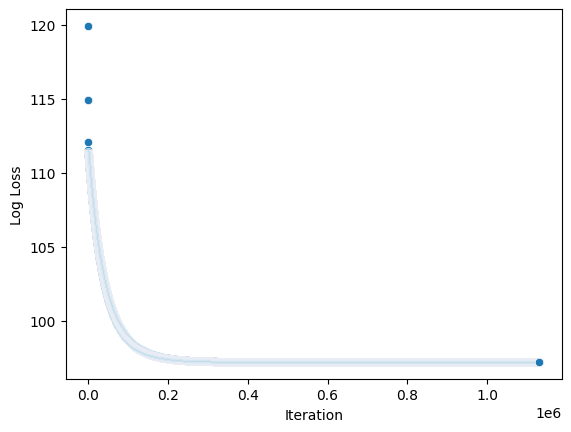

In [39]:
# Plot iterations vs log_loss
gd_plot = sns.scatterplot(x = iterations_list,
                          y = log_loss_list)
gd_plot.set(xlabel ="Iteration", ylabel = "Log Loss")

---
**Addition**

To help the computation be manageable, we can standardize the variable $x$ to find the optimum $\beta_{0}^{\text{std}}$ and $\beta_{1}^{\text{std}}$.

In [40]:
# Function to standardize variable
def standardize(X):
    """
    Function to standardize variable.

    Parameters
    ----------
    X     : {array-like} of shape (n_sample, n_predictors)
          The input data to be standardized

    Returns
    -------
    X_std : {array-like} of shape (n_sample, n_predictors)
          The standardized variable
    """
    # Calculate the mean and standard deviation of the observations
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    # Standarized the value of each observation in variable
    X_std = (X-mean)/std

    return X_std

In [41]:
# Standardize the predictor
X_std = standardize(X)
X_std[0:3]

array([[ 0.95159172],
       [-0.14210656],
       [-0.33231496]])

In [42]:
# Find the optimum b0_std and b1_std from the standardized predictor
b0_std, b1_std, iterations_std, log_loss_std = gradient_descent(X = X_std,
                                                                y = y,
                                                                eta = 0.01,
                                                                tol = 1e-4)

[Text(0.5, 0, 'Iteration'), Text(0, 0.5, 'Log Loss of Standardized Predictor')]

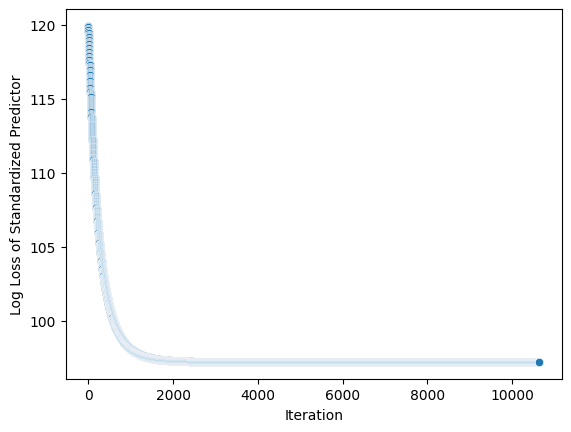

In [43]:
# Plot iterations vs log_loss of standardized predictor
gd_plot = sns.scatterplot(x = iterations_std,
                          y = log_loss_std)
gd_plot.set(xlabel ="Iteration", ylabel = "Log Loss of Standardized Predictor")

In [44]:
# Print the result
print(f"The gradient converge at iteration : {iterations_std[-1]}")
print(f"With the log loss                  : {log_loss_std[-1]:.3f}")
print(f"The optimum parameter")
print(f" - intercept (b0_std) : {b0_std:.4f}")
print(f" - weights (b1_std)   : {b1_std[0]:.4f}")

The gradient converge at iteration : 10637
With the log loss                  : 97.226
The optimum parameter
 - intercept (b0_std) : 0.7258
 - weights (b1_std)   : 1.0456


- Thus, from the standardized $x$ we have the logit model:
$$
\text{log(odds}(\pi(x^{\text{std}}))=0.7258 + 1.0456(x^{\text{std}})
$$

- Note that **the optimum cost function from the original and the standardized predictor has the same value**.
- The optimum $\beta_{0}^{\text{std}}$ and $\beta_{1}^{\text{std}}$ from the standardized predictor differ from those from the original predictor.
- But we can transform $\beta_{0}^{\text{std}}$ and $\beta_{1}^{\text{std}}$ into$\beta_{0}$ and $\beta_{1}$.
- We'll learn this in the next section.

---
## **4. Modelling with Library**
The result from scratch-optimization above is about the same as that from module statsmodels and sklearn.

---
### **4.1. Logistic Regression with Statsmodels**

- You can modelling logistic regression with Statsmodels.
- Find the detailed module reference and example [here](https://www.statsmodels.org/stable/discretemod.html#module-reference).
- For modelling binary response, use `sm.logit`.
- Before fit the model, add constant to variable x if you want the parameter estimate of $\beta_{0}$ (intercept).
- For example:
```
x = sm.add_constant(x)
model = sm.Logit(y, x)
result = model.fit()
```
- To print the model result, use `print(result.summary())`

In [47]:
# Import the package
import statsmodels.api as sm

In [48]:
# Add constant to x --> logit = b0 + b1(x)
# Not adding constant --> logit = b1(x)
X_sm = sm.add_constant(X)

# Model fitting
model_sm = sm.Logit(endog = y,
                    exog = X_sm)
result_sm = model_sm.fit()

Optimization terminated successfully.
         Current function value: 0.562002
         Iterations 6


In [49]:
# Print the model result
print(result_sm.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  173
Model:                          Logit   Df Residuals:                      171
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                  0.1387
Time:                        01:53:19   Log-Likelihood:                -97.226
converged:                       True   LL-Null:                       -112.88
Covariance Type:            nonrobust   LLR p-value:                 2.204e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.3508      2.629     -4.698      0.000     -17.503      -7.199
x1             0.4972      0.102      4.887      0.000       0.298       0.697


- The optimum parameter estimate is the same as the result from gradient descent optimization.

---
### **4.2. Logistic Regression with Scikit-Learn (sklearn)**

- You can modelling logistic regression with sklearn.
- Find the detailed module reference and example [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
- Example:
```
model = LogisticRegression(Parameters).fit(x, y)
```
- Some of Parameters:
  - `penalty` : {`l1`, `l2`, `elasticnet`, `None`}, default=`l2`
  - `fit_intercept` : bool, default=`True`
  - `solver` : {`lbfgs`, `liblinear`, `newton-cg`, `newton-cholesky`, `sag`, `saga’`}, default=`lbfgs’`
  - `multi_class` : {`auto`, `ovr`, `multinomial`}, default=`auto`
- Some attributes of model result:
  - Run `model.intercept_` to print the parameter estimate of $\beta_{0}$
  - Run `model.coef_` to print the parameter estimate of $\beta_{1},\dots,\beta_{j}$

In [50]:
# Import the package
from sklearn.linear_model import LogisticRegression

# Modelling with sklearn
model_sk = LogisticRegression(penalty='none').fit(X = X,
                                                  y = y)

/opt/anaconda3/envs/data_b/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [51]:
# Print the parameter estimate of b0
b0_sk = model_sk.intercept_
b0_sk

array([-12.35081785])

In [52]:
# Print the parameter estimate of b1
b1_sk = model_sk.coef_
b1_sk

array([[0.49723059]])

---
**Modeling Summary**

<center>

|Model|Intercept $\beta_{0}$|Weight $\beta_{1}$|
|:--:|:--:|:--:|
|From Scratch|-12.3501|0.4972|
|Statsmodels|-12.3508|0.4972|
|SKLearn|-12.3508|0.4972|

</center>

# <font color='white'>Model Interpretation</font>

---
## **1. Median Effective Level**

1. Calculate the median effective level ($EL_{50}$) of the crab's width ($x$).
$$
EL_{50} = -\beta_{0}/\beta_{1}
$$

In [65]:
median_el = -b0/b1
median_el

array([24.83915877])


At  `median_el` centimeter of width, the estimated probability of a crab having any satellite increases at the rate of  `0.25*b1`  per one centimeter increase in  its width.

---
## **2. Odds Ratio Interpretation**

1. Can you interpret the logit model $\text{log(odds}(\pi(x))=-12.350 + 0.497(x)$ in the terms of odds ratio?

In [67]:
odds_ratio = np.exp(b1)
odds_ratio

array([1.64411766])

Interpretation: the estimated odds of a crab having any satellite is multiply by `odds_ratio` for one centimeter increase in its width.

2. What's the odds of a crab having any satellite at 22 cm width?

In [57]:
# Make a function of logit
def logit(X, b0, b1):
    """
    Function to calculate the logit or log odds value.

    Parameters
    ----------
    X   : {array-like} of shape (n_sample, n_predictors)
        The independent variable or predictor

    b0  : float
        The optimum parameter estimate of intercept

    b1  : {array-like} of shape (n_predictors, 1)
        The optimum parameter estimate of slope/weights

    Returns
    -------
    log_odds : {array-like} of shape (n_sample, 1)
          The logit or log odds value
    """
    # Write your code here
    log_odds = b0 + b1*X

    return log_odds

```python
logit_22 = logit(X=22, b0=b0, b1=b1)
odds_22 = np.exp(logit_22)
```    

Interpretation: the estimated odds of a 22 cm crab having any satellite is `odds_22`.

3. What's the odds of a crab having any satellite at 23 cm width?

4. What's the ratio of odds of a crab having any satellite between 23cm crab and 22cm crab?

```python
ratio = odds_23/odds_22
```    

You can see the ratio is the odds ratio `np.exp(b1)`.

---
## **3. Standardized Parameter Interpretation**

- The model is fitted to standardized predictor, replacing each $x_{i}$ by $(x_{i}- \bar{x})/s_{x}$ or:
$$
x^{\text{std}} = \frac{x-\bar{x}}{s_{x}}$$
where $\bar{x}=$ `np.mean(x)` and $s_{x}=$ `np.std(x)`.
- Thus, the logit model of $x^{\text{std}}$ :
$$
\text{log(odds}(\pi(x^{\text{std}}))=\beta_{0}^{\text{std}} + \beta_{1}^{\text{std}}(x^{\text{std}})
$$
- The interpretation: **a 1-unit change in the standardized predictor is a standard deviation change in the original predictor**.
- Thus, we can transform the standardized parameter estimate $\beta_{0}^{\text{\text{std}}}$ and $\beta_{1}^{\text{std}}$ into the parameter estimate $\beta_{0}$ and $\beta_{1}$.

$$
\begin{align*}
\text{log(odds}(\pi(x))&=\text{log(odds}(\pi(x^{\text{std}})) \\
\beta_{0} + \beta_{1}(x) &= \beta_{0}^{\text{std}} + \beta_{1}^{\text{std}}(x^{\text{std}}) \\
&= \beta_{0}^{\text{std}} + \beta_{1}^{\text{std}} \left (\frac{x-\bar{x}}{s_{x}}\right ) \\
&= \beta_{0}^{\text{std}} + \beta_{1}^{\text{std}} \left (\frac{x}{s_{x}}\right ) - \beta_{1}^{\text{std}} \left (\frac{\bar{x}}{s_{x}}\right )\\
\beta_{0} + \beta_{1}(x) &= \beta_{0}^{\text{std}}- \beta_{1}^{\text{std}} \left (\frac{\bar{x}}{s_{x}}\right ) +  \frac{\beta_{1}^{\text{std}}}{s_{x}}(x)
\end{align*}
$$
- From the equation above, we got:
  - $\beta_{0} = \beta_{0}^{\text{std}}- \beta_{1}^{\text{std}} \left (\frac{\bar{x}}{s_{x}}\right )$ and
  - $\beta_{1} = \beta_{1}^{\text{std}}/s_{x}$

In [56]:
# Calculate the standard deviation of X
sx = np.std(X)

# Calculate the mean of X
X_bar = np.mean(X)

# Write  your code here
b0_transform = b0_std - b1_std*(X_bar/sx)
b1_transform = b1_std/sx

b0_transform, b1_transform

(array([-12.35075541]), array([0.4972281]))

You can see that the parameter estimate of the original predictor $x$ can be estimated from the parameter estimate of standardized predictor $x^{\text{std}}$.

---
## **4. Predicted Probabilities**

We already have a function to calculate the predicted probabilities; the `sigmoid()` function that results the success probabilities $\pi(x)$.

$$
\pi(x) = \frac{e^{(\beta_{0}+\beta_{1}x)}}{1+e^{(\beta_{0}+\beta_{1}x)}}
$$



```python
# Sigmoid function to calculate success probability (pi) of each observation
def sigmoid(X, b0, b1):
    """
    Function to calculate the success probability of X.

    Parameters
    ----------
    X   : {array-like} of shape (n_sample, n_predictors)
        The independent variable or predictor

    b_0 : float
        The intercept

    b_1 : {array-like} of shape (n_predictors, 1)
        The slope/weights

    Returns
    -------
    pi  : {array-like} of shape (n_sample, 1)
        The success probability of X
    """
    # Calculate the logit value
    logit = b0 + np.dot(X, b1)

    # Calculate the success probability
    pi = np.exp(logit) / (1+np.exp(logit))
    
    return pi
```





1. Can you predict the estimated probability of a crab with 22 cm width having an satellite?

In [59]:
# Calculate the estimated probability here
pi_22 = sigmoid(X=22, b0=b0, b1=b1)

pi_22

array([0.1959754])

2. So, is that crab predicted to have any satellite or not? Explain your answer.



- The estimated probability of a crab with 22 cm width having any satellite ($\pi(22)$) = `pi_22` is less than 0.5.
- Thus, we classify the crab with 22 cm width doesn't have any satellite.

This plot is the predicted probabilities of 173 crabs in observations having any satellite.

[Text(0.5, 0, 'Width (X)'),
 Text(0, 0.5, 'Predicted Probabilities'),
 Text(0.5, 1.0, 'Logistic Function')]

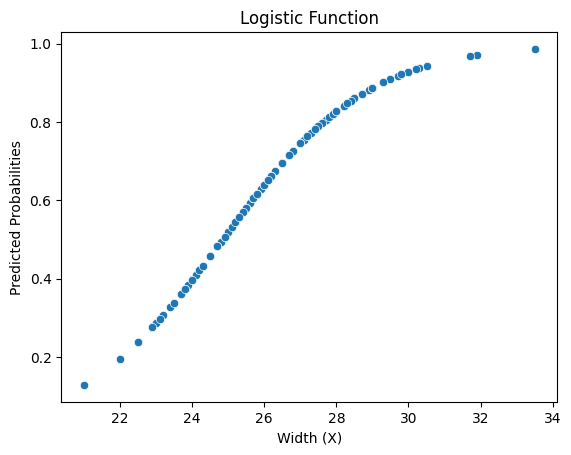

In [60]:
# Calculate the success probability (pi) of each observation.
pi = sigmoid(X=X, b0=b0, b1=b1)

# Plot X vs pi
sigmoid_plot = sns.scatterplot(x=data['Width'], y=pi)
sigmoid_plot.set(xlabel ="Width (X)", ylabel = "Predicted Probabilities", title='Logistic Function')


Yes, that is the plot of sigmoid or logistic function.

And this is the plot of logit function.

[Text(0.5, 0, 'Width (X)'),
 Text(0, 0.5, 'Logit'),
 Text(0.5, 1.0, 'Logit Function')]

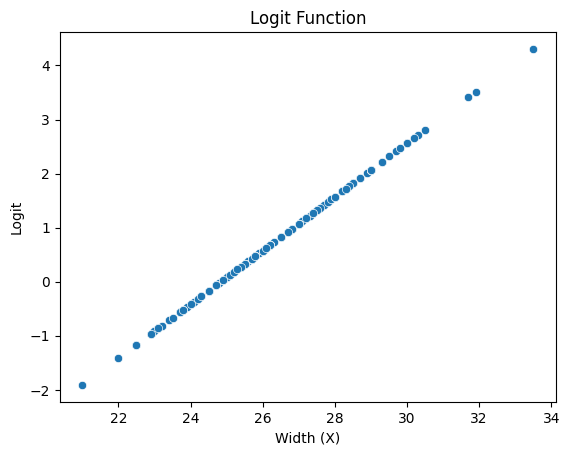

In [61]:
# Calculate log odds (logit) value of each observation.
log_odds = np.log(pi/(1-pi))

# Plot X vs log odds
logit_plot = sns.scatterplot(x=data['Width'], y=log_odds)
logit_plot.set(xlabel ="Width (X)", ylabel = "Logit", title='Logit Function')

From $EL_{50}$, we can plot the decision boundary.

Text(0, 0.5, 'Satellite Outcome')

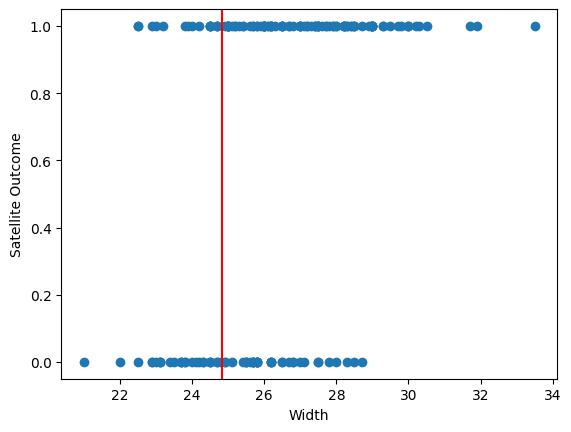

In [68]:
# Plot the decision boundary
plt.scatter(x = X,
            y = y)
plt.axvline(x = median_el,
            color = 'r')
plt.xlabel("Width")
plt.ylabel("Satellite Outcome")

- Median effective level is the level at which each outcome has a 50% chance.
- Thus, when the crab's shell is longer than the median effective level of 24.84 cm, it is classified as a crab with any satellite.
- Otherwise, we predict the crab has no satellite.

# <font color='white'>Significance Testing</font>

- Null Hypothesis: the probability of a crab having any satellite is **independent** of its width.
- Alternative Hypothesis: the probability of a crab having any satellite is **not independent** of its width.
  - $\text H_{0} : \beta_{1} = 0$
  - $\text H_{1} : \beta_{1} \neq 0$

- We already have the test statistic and its P-value from `statsmmodels` output summary.

In [69]:
# Print the model result
print(result_sm.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  173
Model:                          Logit   Df Residuals:                      171
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                  0.1387
Time:                        02:03:56   Log-Likelihood:                -97.226
converged:                       True   LL-Null:                       -112.88
Covariance Type:            nonrobust   LLR p-value:                 2.204e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.3508      2.629     -4.698      0.000     -17.503      -7.199
x1             0.4972      0.102      4.887      0.000       0.298       0.697


- Wald statistic: $z = \beta/ \text{SE}$

In [70]:
# Calculate the Wald statistic z
z_b1 =  0.4972/0.102

z_b1

4.874509803921569

- Rejection region: reject null hypothesis ($\text H_{0}$)
if $\text{P-value}<\alpha$, thus for parameter estimate $\beta_{1}$:
  - `P>|z|` < 0.05, we reject $\text H_{0}$ at $\alpha=0.05$.
- Conclusion: the probability of horseshoe crab having any satellite is not independent of its width.